# Naive Bayes / Gaussaian Naive Bayes

Trying to train the Acceleration Module of Car to decide acceleration based in bumpiness and slope of the terrian.

1. We will generate data
2. Classify using Gaussian Naive Bayes
3. Predict
4. Plot

#### Terrain Data Preparation 

In [1]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

#### Visualization Library

In [2]:
#!/usr/bin/python

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print (image_start+json.dumps(data)+image_end)

#### Classifier

In [3]:
def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    return clf.fit(features_train,labels_train)
    
    ### your code goes here!
    
    

#### Main Class

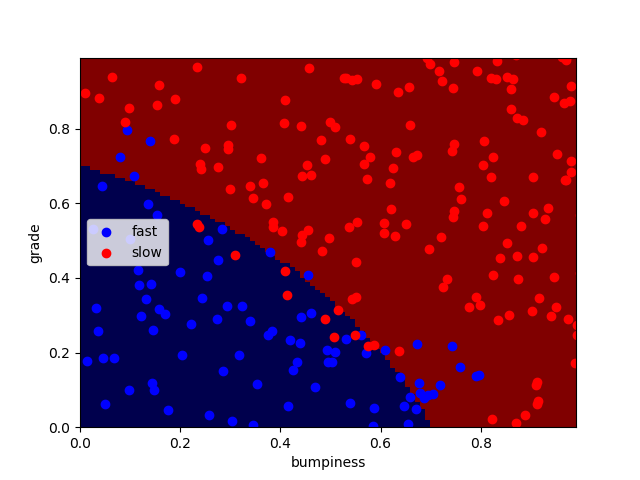

In [4]:
#!/usr/bin/python

""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """


#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture, output_image
#from ClassifyNB import classify

import numpy as np
import pylab as pl
from IPython.display import Image


features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)



# ### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())
Image("test.png")

#### Let's run some prediction on test data

In [6]:
pred = clf.predict(features_test)

#### Let's evaluate / do accuracy test of our classifier

Three ways:
1. Check element by element our predictions with test labels
2. sklearn accuracy_score function to compute this for us ..
3. sklearn score function to predict & score

In [37]:
# Element by Elemnt comparison

compare_perd = np.equal(pred,labels_test,where=True)
correct_pred = [x for i, x in enumerate(correct_perd) if x]

# mean : # of correct pred / Total Pred 

accuracy = len(correct_pred) / len(pred)
accuracy

0.884

In [13]:
# sklearn accuracy_score function
from sklearn.metrics import accuracy_score

accuracy_score(pred, labels_test)

0.88400000000000001

In [10]:
# sklearn score function
clf.score(features_test, labels_test, sample_weight=None)

0.88400000000000001

# So we used Naive Bayes, let's look at depth on how it works ..

Cancer Example:

**Prior** - Known Prior Probability (Prior Test) <br>
**Sensitivity** - Probability of Condition being True (Test Evidence) <br>
**Specitivity** - Probability of Condition being Not True (Test Evidence) <br>

![ML](images/ml1.png)


**Posterior** - Prior * Sensitivity Or Specitivity

*Notation could be confusing* <br>
** P(C) [Prior] ** - Prior Probability of Cancer <br>
** P(${_¬}$C) [Prior] ** - Prior Probability of Not Cancer <br>
** P(Pos | C) [Sensitivity] ** - Probility of Positive Result given person has Cancer <br>
** P(Pos | ${_¬}$C) [Specitivity] ** - Probility of Positive Result given person does not have Cancer <br>
** P(C | Pos) [Posterior] ** - Probability of Cancer given Test is Positive<br>
** P(${_¬}$C | Pos) [Posterior] ** - Probability of NOT Cancer given Test is Positive<br>
![ML](images/ml3.png)


Posteriors at this stage do not add upto 1, so to achieve probabilities whiach add upto 1, we will ** Normalize ** the outputs and to simplify we will call this stage output instead as **Joint**. Normalization is simple math, compute sum of Joints and dividing each Joint value with Sum.
![ML](images/ml4.png)

We did too many computations above, to simplify, let's draw this as visual chart..
![ML](images/ml2.png)

### Let's look at some examples ..

Below example is look at email and identify who sent the email Chris or Sara .. Text sent over email is "Life Deal" - given prior, sentivity and specitivity - let's compute posterior to predict who sent the email ..

![ML](images/ml5.png)
![ML](images/ml6.png)

### So why this is called 'Naive' Bayes ..

So let's take above example in more generic sense, Chris and Sara are nothing but labels and email content of them is nothing but features, Naive Bayes is very strong method based on patterns idetifying Posterior to predict/classify which Label the unknown/unseen example could belong too. Patterns under the hood are nothing but probabilities of features (computed based on frequencies words are repeated) multiplied with prior leading to computation of posterior. Below picture is good depiction of the same.

** Naive ** becuase this method simply ignores Word Order, if we were to read garbled text, it will not make much sense to humans, hence this method as well does not understand the context as well, it simply look at frequencies of words to classify.

![ML](images/ml5.png)

### NB Strengths & Weaknesses

** Strengths **
1. Easy to Implement
2. Efficient - Can easily scale from 20k to 200k english language words with very less overhead.

** Weaknesses **
1. It can break in funny way, phrases encompass multiple words with dramatically different meaning, this algorithm fails to understand. Example: Chicago Bulls, each of these words individually means different meaning, Chicago is city, Bull is animal, however, "Chicago Bulls" as combined term is referred to sports team. NB would fail at such instances.

This brings upto key point that these algorithms are not black boxes and one should understand the under-pinnings of how these work, understand data and see which algorithm suits which scenario. In addition, this also brings key emphasis to testing, testing should be planned well to uncover any gaps with choice of algorithm or tuning techniques leading to bad accuracy scores.
